# What is scikit-learn?  

Scikit-learn is a package of Python's machine learning tool-kit, it creates based on Numpy, Scipy, and Matplotlib.  

Scikit-learn provide four main category of classic models -- classification, regression, clustering, and decomposition.  
* The size of data is better to be larger than 50.  
* If the data has label, use classification model.  
* If the result need to predict value, use regression model.  
* If want to know data distribution, use clustering model.  
* If the data doesn't have label, use decomposition.  

Document: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)  

# Datasets

## 1. load toy datasets  

Scikit-learn provides many kinds of buid-in datasets, we can use keys to see the content of the datasets.  

* load_iris: iris dataset
* load_diabetes: diabetes dataset
* load_digits: hand-written digit dataset
* load_linnerud: exercise and physiology dataset
* load_wine: wine dataset
* load_breast_cancer: Wisconsin's breast cancer dataset

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
print(data.keys())
print(data["target_names"])
print(data["feature_names"])
print(data["data"].shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


## 2. fetch real world datasets  

To the large scale datasets, scikit-learn provides another type of function to get the datasets.  

* fetch_olivetti_faces: face images taken between April 1992 and April 1994 at AT&T Laboratories Cambridge
* fetch_20newsgroups: around 18,000 newsgroups posts on 20 topics
* fetch_20newsgroups_vectorized: verctorized data of around 18,000 newsgroups posts on 20 topics
* fetch_lfw_people: collections of JPEG pictures of famous people collected over the internet 
* fetch_lfw_pairs: collections of JPEG pictures of pairs of famous people collected over the internet
* fetch_covtype: forest covertypes correspond to 30mx30m patchs of forest in the US
* fetch_rcv1: Reuters Corpus Volume I(RCV I) is an archive of over 800,000 manually categorized newswire stories made available.
* fetch_kddcup99: tcpdump dataset
* fetch_california_housing: California housing dataset

In [2]:
from sklearn.datasets import fetch_olivetti_faces

data = fetch_olivetti_faces()
print(data.keys())
print(data["target"])
print(data["images"])
print(data["data"].shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 3

## 3. make datasets  

Scikit-learn can also generate data by build-in function.  

* Single label
  - make_circles: produce Gaussian data with a spherical decision boundary for binary classification
  - make_moon: produce two interleaving half circles
  - make_blobs: provide greater control regarding the centers and standard deviations of each cluster, and is used to demonstrate clustering
  - make_classification: specialize in introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space
  - make_gaussian_quantiles: divide a single Gaussian cluster into near-equal-size classes separated by concentric hyperspheres
  - make_hastie_10_2: generate a similar binary, 10-dimensional problem
* Multilabel
  - make_multilabel_classification: generate random samples with multiple labels
* Biclustering
  - make_regression: produce regression targets as an optionally-sparse random linear combination of random features, with noise
  - make_sparse_uncorrelated: produce a target as a linear combination of four features with fixed coefficients
  - make_friedman1: related by polynomial and sine transforms
  - make_friedman2: include feature multiplication and reciprocation
  - make_friedman3: similar with an arctan transformation on the target
* Generators for manifold learning
  - make_s_curve: generate an S curve dataset
  - make_swiss_roll: generate a swiss roll dataset
* Generators for decomposition
  - make_low_rank_matrix: generate a mostly low rank matrix with vell-shaped singular values
  - make_sparse_coded_signal: generate s signal as a sparse combination of dictionary elements
  - make_spd_matrix: generate a random symmetric, positive-definite matrix
  - make_sparse_spd_matrix: generate a sparse symmetric definite positive matrix

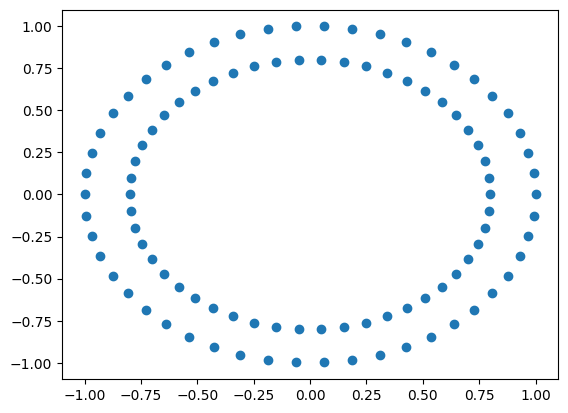

In [5]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

data = make_circles()[0]
plt.scatter(data[:, 0], data[:, 1])

# Classification

## 1. KNeighborsClassifier  

Find most nearest k samples in the data and assign the most frequent category.

* Pro: the model doesn't need to train
* Con: the value of K need to assigned, and the algorithm time complexity is high

Parameters:  
* n_neighbors(int) (<font color="ff0000">default = 5</font>)  
&ensp;&ensp;number of neighbors to query neighbors  
* weights("uniform", "distance" or `user-defined function`) (<font color="ff0000">default = "uniform"</font>)  
  - "uniform": all points in each neighborshood are weighted equally  
  - "distance": closer neighbors have greater influence  
  - `user-defined function`: use a `user-defined function` to calculate the weight of each neighbors  
* algorithm("ball_tree", "kd_tree", "brute", or "auto") (<font color="ff0000">default = "auto"</font>)  
  - "ball_tree": use sklearn.neighbors.BallTree  
  - "kd_tree": use sklearn.neighbors.KDTree  
  - "brute": use a brute-force search  
  - "auto": decide the most appropriate algorithm based on the values passed to fit method  
* leaf_size(int) (<font color="ff0000">default = 30</font>)  
&ensp;&ensp;leaf size passed to BallTree or KDTree
* p(float) (<font color="ff0000">default = 2</font>)  
&ensp;&ensp;power parameter for Minkowski metric  
  - 1: use manhattan distance  
  - 2: use minkowski distance  
* metric(str or `user-defined function`) (<font color="ff0000">default = "minkowski"</font>)  
&ensp;&ensp;metric to use for distance computation  
  - "minkowski": standard Euclidean distance  
  - "precomputed": assumed to be a distance matrix and must be square during fit  
  - use-defined function: takes two arrays representing 1D vectors as inputs and must return one value indicating the distance between those vectors  
* metric_params(dict) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;additional keyword argument for metric function
* n_jobs(int)  (<font color="ff0000">default = None</font>)  
&ensp;&ensp;the number of parallel jobs to run for neighbors search
  - None: means 1 unless in a joblib.parallel_backend context  
  - -1: means using all processors  

In [93]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct KNeighbors model
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]
Probabilities: 
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]

Accuracy: 0.96


## 2. LogisticRegression

A linear regression analysis model, find a line nearest to the sample.  

* Pro: the model is simple, and we can use gradient descend to do incremental training  
* Con: easily influence by noise  

Parameters:  
* penalty(None, "l1", "l2", or "elasticent") (<font color="ff0000">default = "l2"</font>)  
  - None: no penalty  
  - l1: add a L1 penalty term  
  - l2: add a L2 penalty term
  - elasticent: both L1 and L2 penalty terms are added  
* dual(bool) (<font color="ff0000">default = False</font>)  
&ensp;&ensp;dual or primal formulation  
* tol(float) (<font color="ff0000">default = 1e-4</font>)  
&ensp;&ensp;tolerance for stopping criteria  
* C(float) (<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;inverse of regularization strength <font color="007733">(must be a positive float)</font> <font color="007733">(smaller value -> stronger regularization)</font>  
* fit_intercept(bool) (<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether a constant should be added to the decision function  
* intercept_scaling(float) (<font color="ff0000">default = 1</font>)  
&ensp;&ensp;useful when the `solver` "liblinear" is used and `self.fit_intercept` is set to <font color="ff0000">True</font>. In this case, <font color="0000ff">x</font> becomes <font color="0000ff">[x, `self.intercept_scaling`]</font>  
* class_weight(dict or "balanced") (<font color="ff0000">default = None</font>)  
  - None: all classes are supposed to have weight 1  
  - dict: weights associated with classes in the form {<font color="0000ff">class_label</font>: <font color="0000ff">weight</font>}  
  - balanced: `n_samples` / (`n_classes` * `np.bincount(y)`)  
* random_state(int, RandomState instance) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;If `solver` is "sag", "saga", or "liblinear", then shuffle the data.  
* solver("lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", or "saga") (<font color="ff0000">default = "lbfgs"</font>)  
  - lbfgs: handle multinomial loss  
  - liblinear: better for small datasets; limited to on-versus-rest schemes  
  - newton-cg: handle multinomial loss
  - newton-cholesky: better for `n_samples` >> `n_features`  
  - sag: faster for large datasets; handle multinomial loss  
  - saga: faster for large datasets; handle multinomial loss  
* max_iter(int) (<font color="ff0000">default = 100</font>)  
&ensp;&ensp;naximum number of iterations taken for the `solvers` to converge  
* multi_class("auto", "ovr", or "multinomial") (<font color="ff0000">default = "auto"</font>)  
  - auto: select `ovr` if the data is binary or if the `solver` = "liblinear"; otherwise select "multinomial"  
  - ovr: a binary problem is fot for each label  
  - multinomial: the loss minimised is the multinomial loss fot across the entire probability distribution, even when the data is binary<font color="">(`multinomial` is unavailable when `solver` = "liblinear")</font>  
* verbose(int) (<font color="ff0000">default: 0</font>)  
  - for the "liblinear" and "lbfga" `solvers` set verbose to any positive number for verbosity  
* warm_start(bool) (<font color="ff0000">default = False</font>)  
  - True: reuse the solution of the previois call to fit an initialization  
  - False: just erase the previous solution  
* n_jobs(int) (<font color="ff0000">default = None</font>)  
  - `multi_class` = "ovr": number of CPU used when parallelizing over classes  
  - `solver` = "liblinear": ignored `n_jobs`  
  - None: use 1 CPU  
  - -1: use all processors  
* l1_ratio(float) (<font color="ff0000">default = None</font>)  
  - `l1_ratio` = 0: `penalty` = "l1"  
  - 0 < `l1_ratio` < 1: the penalty is a comination of "l1" and "l2"  
  - `l1_ratio` = 1: `penalty` = "l2"  

In [97]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct Logistic Regression model
model = LogisticRegression(max_iter = 500)
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]
Probabilities: 
[[6.91479883e-05 4.34796008e-02 9.56451251e-01]
 [9.08601681e-03 9.76593369e-01 1.43206142e-02]
 [9.88954757e-01 1.10452375e-02 5.34364796e-09]
 [6.22183445e-07 2.13379320e-02 9.78661446e-01]
 [9.76140833e-01 2.38591393e-02 2.76973330e-08]
 [9.04971576e-07 3.91062500e-03 9.96088470e-01]
 [9.86465419e-01 1.35345699e-02 1.13898981e-08]
 [2.26632163e-03 8.05200881e-01 1.92532797e-01]
 [1.12049480e-03 8.01581537e-01 1.97297968e-01]
 [1.68286906e-02 9.56793565e-01 2.63777447e-02]]

Accuracy: 0.9733333333333334


## 3. Naïve bayes  

Use probability and statics knowledge to classify the sample datasets.  

* Pro: save time and memory  
* Con: the result may not that good for data has strong connectivity  

### 3.1 BernoulliNB

Naïve Bayes classifier for multivariate Bernoulli models. The classifier is suitable for discrete data, it's designed for <font color="ff0000">binary/bolean feature</color>.

Parameters:  
* alpha(float or array-like of shape) (<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;additive smoothing parameter  
* binarize(float or None) (<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;threshold for binarizing of sample features  
* fit_prior(bool) (<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether to learn class prior probaboloties or not  
* class_prior(array-like of shape) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;prior probabilities of classes  

In [108]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

# create dataset
X = np.random.randint(5, size = (6, 100))
y = np.array([1, 2, 3, 4, 4, 5])

# construct Bernoulli Naïve Bayes model
model = BernoulliNB()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [1 2 3 4 4 5]
Real:       [1 2 3 4 4 5]
Probabilities: 
[[9.99999997e-01 1.86264514e-09 1.16415321e-10 1.71215005e-11
  9.31322572e-10]
 [1.86264430e-09 9.99999542e-01 1.45519086e-11 3.37002341e-07
  1.19209235e-07]
 [1.16415322e-10 1.45519152e-11 1.00000000e+00 5.70716685e-12
  2.91038305e-11]
 [1.01564514e-11 5.20010310e-09 5.07822568e-12 9.99999994e-01
  6.50012887e-10]
 [2.03129025e-11 1.04002061e-08 1.01564513e-11 9.99999984e-01
  5.20010305e-09]
 [9.31322428e-10 1.19209271e-07 2.91038259e-11 3.74447158e-08
  9.99999842e-01]]

Accuracy: 1.0


### 3.2 CategoricalNB  

Naïve Bayes classifier for categorical features. The classifier is suitable for classification with discrete features that are categorically distributed.  

Parameters:  
* alpha(float) (<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;additive smoothing parameter  
* fit_prior(bool) (<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether to learn class prior probabilities or not  
* class_prior(array-like of shape) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;prior probabilities of classes  
* min_categories(int or array-like of shape) (<font color="ff0000">default = None</font>)  
  - integer: set the minimum number of categories per features to `n_categories` for each feature  
  - array-like of shape: `n_categories[i]` holds the minimum number of categories for the ith column of the input  
  - None: determines the number of categories automatically from the training data  

In [114]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.naive_bayes import CategoricalNB

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct Categorical Naïve Bayes model
model = CategoricalNB()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]
Probabilities: 
[[5.81602597e-04 1.70728504e-02 9.82345547e-01]
 [1.72777321e-06 9.37558852e-01 6.24394200e-02]
 [9.99918152e-01 6.44860462e-05 1.73616278e-05]
 [3.79377063e-05 4.51458705e-02 9.54816192e-01]
 [9.99820339e-01 1.21795061e-04 5.78664316e-05]
 [1.30037884e-04 1.17901015e-03 9.98690952e-01]
 [9.99820339e-01 1.21795061e-04 5.78664316e-05]
 [4.79443079e-05 8.42439023e-01 1.57513033e-01]
 [1.72777321e-06 9.37558852e-01 6.24394200e-02]
 [1.72777321e-06 9.37558852e-01 6.24394200e-02]]

Accuracy: 0.9333333333333333


### 3.3 ComplementNB  

The classifer was designed to correct the "severe assumptions" made by the standard Multinomial Naïve Bayes classifier. It's partiularly suited for <font colot="ff0000">imbalance datasets</font>.  

Parameters:  
* alpha(float or array-like of shape) (<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;additive smoothing parameter  
* fit_prior(bool) (<font color="ff0000">default = True</font>)  
&ensp;&ensp;only used in edge case with single class in the training set  
* class_prior(array-like of shape) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;prior probabilities of the classes  
* norm(bool) (<font color="ff0000">default = False</font>)  
&ensp;&ensp;whether or not a second normalization of the weights is performed

In [115]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.naive_bayes import ComplementNB

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct Complement Naïve Bayes model
model = ComplementNB()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 2 0 2 0 2 0 2 2 2]
Real:       [2 1 0 2 0 2 0 1 1 1]
Probabilities: 
[[0.17938694 0.29726877 0.5233443 ]
 [0.29875572 0.3255812  0.37566309]
 [0.64096343 0.21767018 0.14136639]
 [0.19691959 0.31487331 0.4882071 ]
 [0.57178068 0.24955301 0.17866631]
 [0.16923855 0.29249489 0.53826656]
 [0.58143865 0.24401808 0.17454328]
 [0.29133033 0.31392104 0.39474863]
 [0.27822944 0.31938124 0.40238931]
 [0.31347551 0.31455608 0.37196841]]

Accuracy: 0.6666666666666666


### 3.4 GaussianNB  

Gaussian Naïve Bayes. Can perform online updates to model parameters via `partial_fit`.  

Parameters:  
* priors(array-like of shape) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;prior probabilities of the classes  
* var_smoothing(float) (<font color="ff0000">default = 1e-9</font>)  
&ensp;&ensp;portion of the largest variance of all features that is added to variances for calculation stability  

In [117]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct Gaussian Naïve Bayes model
model = GaussianNB()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]
Probabilities: 
[[3.39845739e-190 1.04253685e-006 9.99998957e-001]
 [2.74599487e-061 9.99993984e-001 6.01632484e-006]
 [1.00000000e+000 3.04886902e-020 1.36260578e-026]
 [9.79175322e-229 1.34018147e-006 9.99998660e-001]
 [1.00000000e+000 6.53644612e-018 2.77336308e-025]
 [3.23245181e-254 6.35381031e-011 1.00000000e+000]
 [1.00000000e+000 6.10454787e-018 1.90690879e-025]
 [1.26187890e-112 7.99294752e-001 2.00705248e-001]
 [8.26876145e-114 9.12844444e-001 8.71555561e-002]
 [4.50400610e-072 9.99807026e-001 1.92973847e-004]]

Accuracy: 0.96


### 3.5 MultinomialNB  

Naïve Bayes classifier for multinomial models. The classifier is suitable for classification with discrete features. The multinomial distribution normally requires integer feature counts.  

Parameters:  
* alpha(float or array-like of shape) (<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;additive smoothing parameter  
* fit_prior(bool) (<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether to learn class prior probabilities or not  
* class_prior(array-like of shape) (<font color="ff0000">default = None</font>)  
&ensp;&ensp;prior probabilities of the classes  

In [118]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct Multinomial Naïve Bayes model
model = MultinomialNB()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]
Probabilities: 
[[0.0065203  0.4374698  0.5560099 ]
 [0.07262213 0.49469281 0.43268506]
 [0.83215693 0.11297048 0.0548726 ]
 [0.00884813 0.4781803  0.51297157]
 [0.72219723 0.17854884 0.09925393]
 [0.00430683 0.4372322  0.55846098]
 [0.73650871 0.16958211 0.09390918]
 [0.04370222 0.50439037 0.45190741]
 [0.03981358 0.5040761  0.45611033]
 [0.0703346  0.4964765  0.43318891]]

Accuracy: 0.9533333333333334


## 4. SVM (Support Vector Machine)

The ideal is to find the maximum distance between classification interface.  

* Pro: the influence of noise is less  
* Con: the computing speed is low  

### 4.1 LinearSVC

Linear Support Vector Classification. Implmented in terms of bilinear, so it has more flexibility in choice of penalities ans loss functions and should scale better to large numbers of samples.  

Parameters:  
* penalty ("l1" or "l2")(<font color="ff0000">default = "l2"</font>)
  - l1: specify standard norm used in SVC  
  - l2: lead to `coef_` vectors that are sparse  
* loss ("hinge" or "squared_hinge")(<font color="ff0000">default = "squared_hinge"</font>)
  - hinge: standard SVM loss  
  - squard_hinge: the square of the hinge loss
* dual ("auto" or bool)(<font color="ff0000">default = "auto"</font>)
  - auto: choose the value of the parameter automatically  
  - True: prefer when `n_samples` <= `n_features`  
  - False: prefer when `n_samples` > `n_features`  
* tol (float)(<font color="ff0000">default = 1e-4</font>)  
&ensp;&ensp;tolerance for stopping criteria  
* C (float)(<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;the strength of the regularization is inversely proportional to `C`  
* multi_class ("ovr" or "crammer_singer")(<font color="ff0000">default = "ovr"</font>)  
  - ovr: train n_classes one-vs-rest classifiers  
  - crammer_singer: optimizes a joint objective over all classes  
* fit_intercept (bool)(<font color="ff0000">default = True</font>)
&ensp;&ensp;whether or not to fit an intercept  
* intercept_scaling (float)(<font color="ff0000">default = 1.0</font>)  
  - `fit_intercept` = True: instance vector x becomes `[x_1, ..., x_n, intercept_scaling]`
  - otherwise: weights becomes `[w_x_1, ..., w_x_n, w_intercept * intercept_scaling]`
* class_weight (dict or "balanced")(<font color="ff0000">default = None</font>)
  - dict: set the parameter `C` of class i to `class_weight[i] * C`
  - None: all classes have weight 1
  - balanced: uses th values of y to automatically adjust weights inversely propotional to class frequency  
* verbose (int)(<font color="ff0000">default = 0</font>)  
&ensp;&ensp;enable verbose output  
* random_state (int, RandomState instance or None)(<font color = "ff0000">default = None</font>)  
&ensp;&ensp;control the pseudo random number generation for shuffling the data for the dual coordinate descent  
* max_iter (int)(<font color="ff0000">default = 1000</font>)  
&ensp;&ensp;the maximum number of iterations  

In [4]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = LinearSVC(dual = "auto")
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]

Accuracy: 0.9666666666666667


### 4.2 NuSVC  

Nu-Support Vector Classifier. Similar to SVC but uses a parameter to control the number of support vectors.    

Parameters:  
* nu (float)(<font color="ff0000">default = 0.5</font>)  
&ensp;&ensp;An upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1].  
* kernel ("linear", "poly", "rbf", "sigmoid", "precomputed" or callable)(<font color="ff0000">default = "rbf"</font>)  
&ensp;&ensp;specify the kernel type to be used in the algorithm  
* degree (int)(<font color="ff0000">default = 3</font>)  
&ensp;&ensp;degree of the polynomial kernel function  
* gamma ("scale", "auto" or float)(<font color="ff0000">default = "scale"</font>)  
  - scale: use `1 / (n_features * X.var())`  
  - auto:use `1 / n_features`  
  - float must be non-negative  
* coef0 (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;independent term in kernel function 
* shrinking (bool)(<font color="ff0000">default = True</font>)
&ensp;&ensp;whether to use the shrinking heuristic  
* probability (bool)(<font color="ff0000">default = False</font>)
whether to enable probability estimates  
* tol (float)(<font color="ff0000">default = 1e-3</font>)  
&ensp;&ensp;tplerance for stopping criteria  
* cache_size (float)(<font color="ff0000">default = 200</font>)  
&ensp;&ensp;the size of the kernel cache (MB)  
* class_weight (dict, "balanced" or None)(<font color="ff0000">default = None</font>)
  - dict: set the parameter `C` of class i to `class_weight[i] * C for SVC  
  - balanced: use the values of y to automactically adjust weights inversely proportional to class frequencies as `n_samples / (n_classses * np.bincount(y))`  
* verbose (bool)(<font color="ff0000">default = False</font>)  
&ensp;&ensp;enable verbose output  
* max_iter (int)(<font color="ff0000">default = -1</font>)  
&ensp;&ensp;hard limit on iterations within solver  
* decision_function_shape ("ovo" or "ovr")(<font color="ff0000">default = "ovr"</font>)
&ensp;&ensp;whether to return a one-vs-rest(ovr) decision function of shape `(n_samples, n_classes)` as all other classifier, or the original one-vs-one(ovo) decision function of libsvm which has shape `(n_samples, n_classes * (n_classes - 1) / 2)  
* break_ties (bool)(<font color="ff0000">default = False</font>)
  - `break_tie` = True & `decision_function_shape` = "ovr" & number of classes > 2: predict will break ties according to the confidence value of `decision_function`  
  - otherwise: the first class among the tied classes is returned  
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;controls the pseudo random number generation for shuffling the data for probability estimates  

In [2]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import NuSVC

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = NuSVC()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]

Accuracy: 0.9733333333333334


### 4.3 SVC  

C-Support Vector Classification. The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.  

Parameters:  
* C (float)(<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;the strength of the regularization is inversely proportional to C. 
* kernel ("linear", "poly", "rbf", "sigmoid", "precomputed" or callable)(<font color="ff0000">default = "rbf"</font>)  
&ensp;&ensp;specifies the kernel type to be used in the algorithm  
* degree (int)(<font color="ff0000">default = 3</font>)
&ensp;&ensp;specifies the kernel type to be used in the algorithm  
* gamma ("scale", "auto" or float)(<font color="ff0000">default = "scale"</font>)
  - scale: uses `1 / (n_features * X.var())  
  - auto: uses `1 / n_features`  
  - float: must be non-negative  
* coef0 (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;independent term in kernel function. 
* shrinking (bool)(<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether to use the shrinking heuristic  
* probability (bool)(<font color="ff0000">default = False</font>)  
&ensp;&ensp;whether to enable probability estimates  
* tol (float)(<font color="ff0000">default = 1e-3</font>)  
&ensp;&ensp;tolerance for stopping criteria  
* cache_size (float)(<font color="ff0000">default = 200</font>)  
&ensp;&ensp;specify the size of the kernel cache (MB) 
* class_weight (dict or "balanced")(<font color="ff0000">default = None</font>)
  - dict: set the parameter `C` of class i to `class_weight[i] * C` for SVC  
  - balanced: uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`  
* verbose (bool)(<font color="ff0000">default = False</font>)  
&ensp;&ensp;enable verbose output  
* max_iter (int)(<font color="ff0000">default = -1</font>)  
&ensp;&ensp;hard limit on iterations within solver  
* decision_function_shape ("ovo" or "ovr")(<font color="ff0000">default = "ovr"</font>)  
  - ovo: used as a multi-class strategy to train models  
  - ovr: an ovr matric is only constructed from the ovo mstrix  
* break_ties (bool)(<font color="ff0000">default = False</font>)  
  - `break_tie` = True & `decision_function_shape` = "ovr" & number of classes > 2: predict will break ties according to the confidence value of `decision_function`  
  - otherwise: the first class among the tied classes is returned  
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;controls the pseudo random number generation for shuffling the data for probability estimates  

In [3]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import SVC

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = SVC()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]

Accuracy: 0.9733333333333334


## 5. Decision Tree  

An algorithm generate classification rule by generalizing data.  

* Pro: high interpretability, can fit any kinds of training data  
* Con: the training time is long, and it's easily lead to over-fitting

### 5.1 DecisionTreeClassifier  

A decision tree classifier.  

Parameters:  
* criterion ("gini", "entropy" or "log_loss")(<font color="ff0000">default = "gini"</font>)  
&ensp;&ensp;the function to measure the quality of a split  
* splitter ("best" or "random")(<font color="ff0000">default = "best"</font>)  
&ensp;&ensp;the strategy used to choose the split at each node  
* max_depth (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the maximum depth of the tree  
* min_samples_split (int or float)(<font color="ff0000">default = 2</font>)
  - int: consider `min_samples_split` as the minimum number  
  - float: `min_samples_split` is a fraction and  are the minimum number of samples for each split`ceil(min_samples_split * n_samples)`  
* min_samples_leaf (int or float)(<font color="ff0000">default = 1</font>)
  - int: consider `min_samples_leaf` as the minimum number  
  - float: `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node  
* min_weight_fraction_leaf (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;the minimum weighted fraction of the sum total of weights required to be at a leaf node  
* max_features (int, float, "auto", "sqrt" or "log2")(<font color="ff0000">default = None</font>)
  - int: consider `max_features` features at each split  
  - float: `max_features` is a fraction and `max(1, int(max_features * n_features_in_)) features are considered at each split  
  - sqrt: `max_features` = `sqrt(n_features)`  
  - log2: `max_features` = `log2(n_features)`  
  - None: `max_features` = `n_features`  
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;controls the randomness of the estimator  
* max_leaf_nodes (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;grow a tree with `max_leaf_nodes` in best-first fashioon  
* min_impurity_decrease (float)(<font color="ff0000">default = 0.0</font>)
&ensp;&ensp;a node will be split if this split indecues a decrease of the impurity greater than or equal to this value
  - weighted impurity decrease quation  
  &ensp;&ensp;`N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity`
* class_weight (dict, list of dict or "balanced")(<font color="ff0000">default = None</font>)
  - dict or list of dict: weights associated with classes in the form `{class_label: weight}
  - balanced: uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`
  - None: all classes are supposed to have weight 1
* ccp_alpha (non-negative float)(<font color="ff0000">default = 0.0</font>)
&ensp;&ensp;Complexity parameters used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than `ccp_alpha` will be chosen.  

In [4]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = DecisionTreeClassifier()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]

Accuracy: 1.0


### 5.2 ExtraTreeClassifier  

An extremely randomized tree classifier. Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the samples of a node into two groups, random splits are drawn for each of the `max_features` randomly selected features and the best split among those is chosen. When `max_features` is set 1, this amounts to building a totally random decision tree.

Parameters:  
* criterion ("gini", "entropy" or "log_loss")(<font color="ff0000">default = "gini"</font>)  
&ensp;&ensp;the function to measure the quality of a split  
* splitter ("best" or "random")(<font color="ff0000">default = "best"</font>)  
&ensp;&ensp;the strategy used to choose the split at each node  
* max_depth (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the maximum depth of the tree  
* min_samples_split (int or float)(<font color="ff0000">default = 2</font>)
  - int: consider `min_samples_split` as the minimum number  
  - float: `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split  
* min_samples_leaf (int or float)(<font color="ff0000">default = 1</font>)
  - int: consider `min_samples_leaf` as the minimum number  
  - float: `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node  
* min_weight_fraction_leaf (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;the minimum weighted fraction of the sum total of weights required to be at a leaf node  
* max_features (int, float, "auto", "sqrt" or "log2")(<font color="ff0000">default = None</font>)
  - int: consider `max_features` features at each split  
  - float: `max_features` is a fraction and `max(1, int(max_features * n_features_in_)) features are considered at each split  
  - sqrt: `max_features` = `sqrt(n_features)`  
  - log2: `max_features` = `log2(n_features)`  
  - None: `max_features` = `n_features`  
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;used to pick randomly the `max_features` used at each split  
* max_leaf_nodes (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;grow a tree with `max_leaf_nodes` in best-first fashioon  
* min_impurity_decrease (float)(<font color="ff0000">default = 0.0</font>)
&ensp;&ensp;a node will be split if this split indecues a decrease of the impurity greater than or equal to this value
  - weighted impurity decrease quation  
  &ensp;&ensp;`N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity`
* class_weight (dict, list of dict or "balanced")(<font color="ff0000">default = None</font>)
  - dict or list of dict: weights associated with classes in the form `{class_label: weight}
  - balanced: uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`
  - None: all classes are supposed to have weight 1
* ccp_alpha (non-negative float)(<font color="ff0000">default = 0.0</font>)
&ensp;&ensp;Complexity parameters used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than `ccp_alpha` will be chosen.  

In [6]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import ExtraTreeClassifier

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = ExtraTreeClassifier()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]

Accuracy: 1.0


## 6. Integrated classifier  

Combine many small classifiers into a large classifier.  

Pro: the model's precision is high, and it's not easy to lead to over-fitting  
Con: the training speed is low

### 6.1 RandomForestClassifier

A random forest classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  

Parameters:  
* n_estimators (int)(<font color="ff0000">default = 100</font>)  
&ensp;&ensp;the number of trees in the forest  
* criterion ("gini", "entropy", "log_loss")(<font color="ff0000">default = "gini</font>)  
&ensp;&ensp;the function to measure the quality of a split  
* max_depth (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the maimum depth of the tree  
* min_samples_split (int or float)(<font color="ff0000">default = 2</font>)  
&ensp;&ensp;the minimum number of samples required to split an internal node  
  - int: consider `min_samples_split` as the minimum number
  - float: `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split  
* min_samples_leaf (int or float)(<font color="ff0000">default = 1</font>)
&ensp;&ensp;the minimum number of samples required to be at a leaf node  
  - int: consider `min_samples_leaf` as the minimum number  
  - float: `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node. 
* min_weight_fraction_leaf (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node  
* max_features ("sqrt", "log2", int, float or None)(<font color="ff0000">default = "sqrt"</font>)
&ensp;&ensp;the number of features to consider when looking for the best split  
  - int: consider `max_features` features at each split
  - float: `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split  
  - sqrt: `max_features` = `sqrt(n_features)`
  - log2: `max_features` = `log2(n_features)`
  - None: `max_features` = `n_features`
* max_leaf_nodes (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;grow trees with `max_leaf_nodes` in best-first fashion  
* min_impurity_decrease (float)(<font color="ff0000">default = 0.0</font>)
&ensp;&ensp;a node will be split if this split induces a decrease of the impurity greater than or equal to this value  
  - weighted impurity decrease equation  
  `N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)`
* bootstrap (bool)(<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether bootstrap samples are used when building trees  
* oob_score (bool or callable)(<font color="ff0000">default = False</font>)  
&ensp;&ensp;whether to use out-of-bag samples to estimate the generalization score  
* n_jobs(int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the number of jobs to run in parallel  
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;controls both the randomness of the bootstrapping of the samples used when building trees (if `bootstrap` = True) and the sampling of the features to consider when looking for the best split at each node (if `max_features` < `n_features`)  
* verbose (int)(<font color="ff0000">default = 0</font>)  
&ensp;&ensp;control the verbosity whe fitting and predicting  
* warm_start (bool)(<font color="ff0000">default = False</font>)
  - True: reuse the solution of the previous call to fit and add more estimators to the ensemble
  - False: just fit a whole new forest
* class_weight ("balanced", "balanced_subsample", dict or list of dict)(<font color="ff0000">default = None</font>)
  - dict or list of dict: weights associated with classes in the form `{class_label: weight}`
  - balanced: uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as `n_samples / (n_classes * np.bincount(y))`
  - balanced_subsample: the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown
  - None: all classes are supposed to have weight one
* ccp_alpha (non-negative float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen.  
* max_samples (int or float)(<font color="ff0000">default = None</font>)
&ensp;&ensp;If bootstrap is True, the number of samples to draw from X to train each base estimator.
  - int: draw `max_samples` samples
  - float: draw `max(round(n_samples * max_samples), 1)` samples
  - None: draw `X.shape[0]` samples

In [7]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = RandomForestClassifier()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]

Accuracy: 1.0


### 6.2 GBDT  

Gradient Boosting for classification. This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage `n_classes_` regression trees are fit on the negative gradient of the loss function.  

Parameters:  
* loss ("log_loss" or "exponential")(<font color="ff00000">default = "log_loss"</font>)
  - log_loss: Refers to binomial and multinomial deviance, the same as used in logistic regression. It's a good choice for classification with probabilistic outputs.
  - exponential: gradient boosting recovers the AdaBoost algorithm
* learning_rate (float)(<font color="ff00000">default = 0.1</font>)  
&ensp;&ensp;shrinks the contribution of each tree by `learning_rate`
* n_estimators (int)(<font color="ff00000">default = 100</font>)  
&ensp;&ensp;the number of boosting stages to perform  
* subsamples (float)(<font color="ff00000">default = 1.0</font>)  
&ensp;&ensp;the number of boosting stages to perform  
* criterion ("friedman_mse" or "squared_error")(<font color="ff00000">default = "friedman_mse</font>)  
&ensp;&ensp;the function to measure the quality of a split  
* min_samples_split (int or float)(<font color="ff00000">default = 2</font>)  
&ensp;&ensp;the minimum number of samples required to split an internal node  
  - int: values must be in [2, inf)
  - float: values must be in (0.0, 1.0] and `min_samples_split` will be `ceil(min_samples_split * n_samples)`
* min_samples_leaf (int or float)(<font color="ff00000">default = 1</font>)  
&ensp;&ensp;the minimum number of samples required to be at a leaf node
  - int: values must be in [1, inf)
  - float: values must be in (0.0, 1.0) and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`
* min_eight_fraction_leaf (float)(<font color="ff00000">default = 0.0</font>)  
&ensp;&ensp;the minimum weighted fraction of the sum total of weights required to be at a leaf node  
* max_depth (int or None)(<font color="ff00000">default = 3</font>)  
&ensp;&ensp;maximum depth of the individual regression estimators  
* min_impurity_decrease (float)(<font color="ff00000">default = 0.0</font>)  
&ensp;&ensp;A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Values must be in [0.0, inf).  
  - weighted impurity decrese equation  
  `N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)`
* init (estimator or "zero")(<font color="ff00000">default = None</font>)  
&ensp;&ensp;an estimator object that is used to compute the initial predictions  
* random_state (int, RandomState instance or None)(<font color="ff00000">default = None</font>)  
&ensp;&ensp;controls the random seed given to each Tree estimator at each boosting iteration  
* max_features ("sqrt", "log2", int or float)(<font color="ff00000">default = None</font>)  
&ensp;&ensp;the number of features to consider when looking for the best split  
  - int: values must be in [1, inf)
  - float: values must be in (0.0, 1.0] and the features considered at each split will be `max(1, int(max_features * n_features_in_))
  - sqrt: `max_features` = `sqrt(n_features)
  - log2: `max_features` = `log2(n_features)
  - None: `max_features` = `n_features`
* verbose (int)(<font color="ff00000">default = 0</font>)  
&ensp;&ensp;enable verbose output  
* max_leaf_nodes (int)(<font color="ff00000">default = None</font>)  
&ensp;&ensp;grow trees with max_leaf_nodes in best-first fashion  
* warm_start (bool)(<font color="ff00000">default = False</font>)
  - True: reuse the solution of the orevious call to fit and add more estimators to ensemble
  - False: just erase the previous solution  
* validation_fraction (float)(<font color="ff00000">default = 0.1</font>)  
&ensp;&ensp;The proportion of training data to set aside as validation set for early stopping. Values must be in (0.0, 1.0).  
* n_iter_no_change (int)(<font color="ff00000">default = None</font>)  
&ensp;&ensp;used to decide if early stopping will be used to terminate training when validation score is not improving  
* tol (float)(<font color="ff00000">default = 1e-4</font>)  
&ensp;&ensp;Tolerance for the early stopping. Values must be in [0.0, inf)  
* ccp_alpha (non-negative float)(<font color="ff00000">default = 0.0</font>)  
&ensp;&ensp;complexity parameter used for Minimal Cost-Complexity Pruning

In [8]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = GradientBoostingClassifier()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]

Accuracy: 1.0


### 6.3 Adaboost

An AdaBoost classifier. An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Parameters:  
* estimator (object)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the base estimator from which the boosted ensemble is built 
* n_estimators (int)(<font color="ff0000">default = 50</font>)  
&ensp;&ensp;The maximum number of estimators at which boosting is terminated. Values must be in [1, inf).  
* learning_rate (float)(<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;weight applied to each classifier at each boosting iteration. 
* algorithm ("SAMME" or "SAMME.R")(<font color="ff0000">default = "SAMME.R"</font>)  
&ensp;&ensp;`SAMME.R` typically converges faster than `SAMME`, achieving a lower test error with fewer boosting iterations  
  - SAMME: use the SAMME discrete boosting algorithm
  - SAMME.R: use the SAMME.R real boosting algorithm
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;controls the random seed given at each estimator at each boosting iteration  
* base_estimator (object)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the base estimator from which the boosted ensemble is built

In [9]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.ensemble import AdaBoostClassifier

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = AdaBoostClassifier()
model.fit(X, y)

# predict
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]

Accuracy: 0.96


## Evaluation indicator


* TP: `True` sample predicted to `True` sample
* FP: `False` sample predicted to `True` sample
* FN: `True` sample predicted to `False` sample
* TN: `False` sample predicted to `True` sample

$$ precision = \frac{TP}{TP + FP} $$  
$$ recall = \frac{TP}{TP + FN} $$  
$$ accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$  
$$ f1\_score = \frac{2 * precision * recall}{precision + recall} $$  

### Confusion Matrix

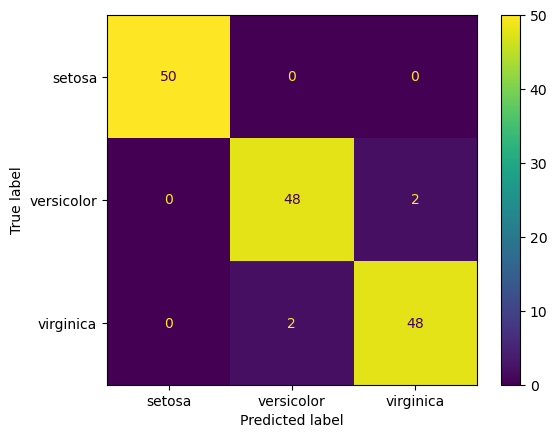

In [25]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import matplotlib.pyplot as plt

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = SVC()
model.fit(X, y)

# get prediction and construct confusion matrix
prediction = model.predict(X)
confusion_matrix = confusion_matrix(y, prediction)

# get information
locations = [i for i in range(len(Counter(y)))]
labels = load_iris().target_names

# display confusion matrix
result = ConfusionMatrixDisplay(confusion_matrix, display_labels = labels)
result.plot()

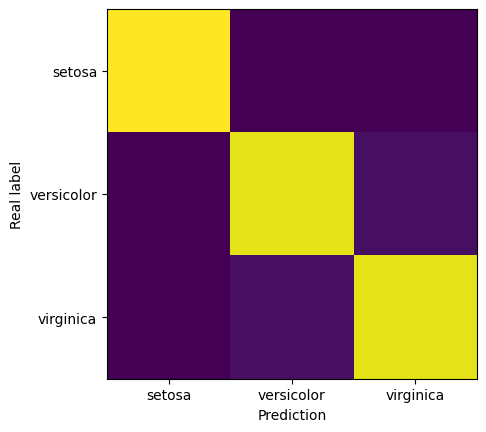

In [26]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import matplotlib.pyplot as plt

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct model
model = SVC()
model.fit(X, y)

# get prediction and construct confusion matrix
prediction = model.predict(X)
confusion_matrix = confusion_matrix(y, prediction)

# get information
locations = [i for i in range(len(Counter(y)))]
labels = load_iris().target_names

# display confusion matrix
plt.xticks(locations, labels)
plt.yticks(locations, labels)
plt.xlabel("Prediction")
plt.ylabel("Real label")
plt.imshow(confusion_matrix)
plt.show()

# Regression

## LinearRegression  

Ordinary least squares Linear Regression. LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.  

Parameters:  
* fit_intercept (bool)(<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether to calculate the intercept for this model  
* copy_X (bool)(<font color="ff0000">default = True</font>)  
&ensp;&ensp;X will be copied  
* n_jobs (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the number of jobs to use for the computation  
* positive (bool)(<font color="ff0000">default = False</font>)  
&ensp;&ensp;forces the coefficients to be positive  

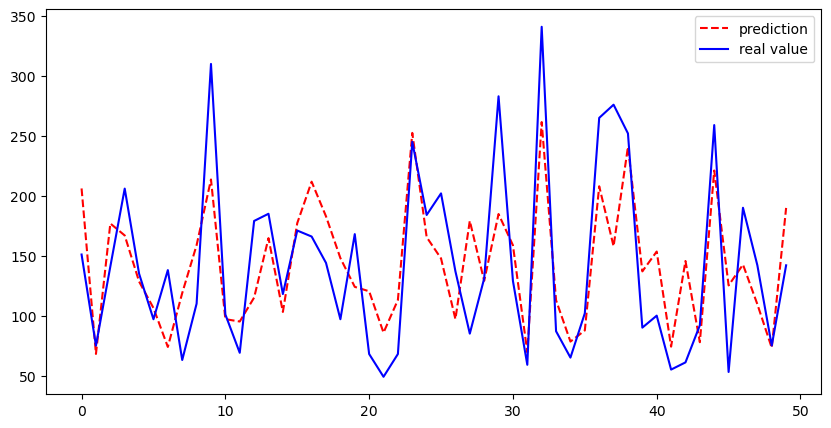

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# load data
data = load_diabetes()
X, y = data["data"], data["target"]

# construct model
model = LinearRegression()
model.fit(X, y)

# predict
prediction = model.predict(X)

# display the first 50 data
plt.figure(figsize = (10, 5))
plt.plot(prediction[: 50], linestyle = "--", color = "r", label = "prediction")
plt.plot(y[: 50], color = "b", label = "real value")
plt.legend()
plt.show()

## Lasso  

A linear model that estimates sparse coefficients. It's useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent.

The object function to minimize:  

$$ \underset{w}{min}\frac{1}{2n_{samples}}\|Xw - y\|_2^2 + \alpha\|w\|_1 $$

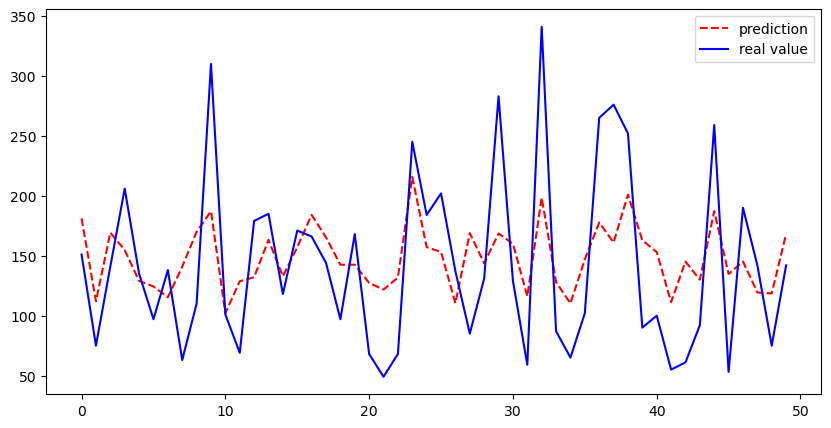

In [43]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# load data
data = load_diabetes()
X, y = data["data"], data["target"]

# construct model
model = Lasso()
model.fit(X, y)

# predict
prediction = model.predict(X)

# display the first 50 data
plt.figure(figsize = (10, 5))
plt.plot(prediction[: 50], linestyle = "--", color = "r", label = "prediction")
plt.plot(y[: 50], color = "b", label = "real value")
plt.legend()
plt.show()

## SVR  

Epsilon-Support Vector Regression. The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to datasets with more than a couple of 10000 samples.  

Parameters:  
* kernel ("linear", "poly", "rbf", "sigmoid", "precomputed" or callable)(<font color="ff0000">default = "rbf"</font>)  
&ensp;&ensp;specifies the kernel type to be used in the algorithm  
* degree (int)(<font color="ff0000">default = 3</font>)  
&ensp;&ensp;degree of the polynomial kernel function  
* gamma ("scale", "auto" or float)(<font color="ff0000">default = "scale"</font>)
  - scale: uses `1 / (n_features * X.var())`
  - auto: uses `1 / n_features`
  - float: must be non-negative
* coef0 (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;independent term in kernel function  
* tol (float)(<font color="ff0000">default = 1e-3</font>)  
&ensp;&ensp;tolerance for stopping criterion  
* C (float)(<font color="ff0000">default = 1.0</font>)  
&ensp;&ensp;Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.  
* epsilon (float)(<font color="ff0000">default = 0.1</font>)  
&ensp;&ensp;It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value. Must be non-negative.  
* shrinking (bool)(<font color="ff0000">default = True</font>)  
&ensp;&ensp;whether to use the shrinking heuristic  
* cache_size (float)(<font color="ff0000">default = 200</font>)  
&ensp;&ensp;specify the size of the kernel cache (MB)  
* verbose (bool)(<font color="ff0000">default = False</font>)  
&ensp;&ensp;enable verbose output  
* max_iter (int)(<font color="ff0000">default = -1</font>)  
&ensp;&ensp;hard limit on iterations within solver  

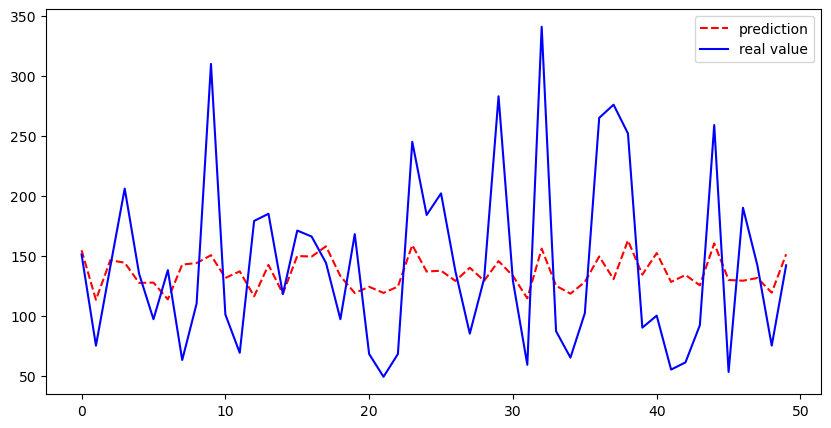

In [44]:
from sklearn.datasets import load_diabetes
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# load data
data = load_diabetes()
X, y = data["data"], data["target"]

# construct model
model = SVR()
model.fit(X, y)

# predict
prediction = model.predict(X)

# display the first 50 data
plt.figure(figsize = (10, 5))
plt.plot(prediction[: 50], linestyle = "--", color = "r", label = "prediction")
plt.plot(y[: 50], color = "b", label = "real value")
plt.legend()
plt.show()

## DecisionTreeRegressor  

A decision tree regressor.  

Parameters:  
* criterion ("squared_error", "friedman_mse", "absolute_error" or "poisson")(<font color="ff0000">default = "squared_error"</font>)  
&ensp;&ensp;the function to measure the quality of a split  
  - squared_error: equal to variance reduction as feature selection criterion and minimize the L2 loss using the mean of each terminal node
  - friedman_mse: uses mean squared error with Friedman's improvement score for potential splits
  - absolute_error: minimizes the L1 loss using the median of each terminal node
  - poisson: uses reduction in Poisson deviance to find splits
* splitter ("best" or "random")(<font color="ff0000">default = "best"</font>)  
&ensp;&ensp;the strategy used to choose the split at each node  
* max_depth (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the maximum depth of the tree  
* min_samples_split (int or float)(<font color="ff0000">default = 2</font>)  
&ensp;&ensp;the minimum number of samples required to split an internal node  
  - int: consider `min_samples_split` as the minimum number
  - float: `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split  
* min_samples_leaf (int or float)(<font color="ff0000">default = 1</font>)  
&ensp;&ensp;the minimum number of samples required to be at a leaf node  
  - int: consider `min_samples_leaf` as the minimum number
  - float: `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node
* min_weight_fraction_leaf (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;the minimum weighted fraction of the sum total of weights required to be at a leaf node  
* max_features (int, float, "sqrt" or "log2")(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the number of features to consider when looking for the best split  
  - int: consider `max_features` features at each split
  - float: `max(1, int(max_features * n_features_in_))` features are cosidered at each split
  - sqrt: `max_features = sqrt(n_features)`
  - log2: `max_features = log2(n_features)`
  - None: `max_features = n_features`
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;controls the randomness of the estimator  
* max_leaf_nodes (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;grow a tree with `max_leaf_nodes` in best-first fashion  
* min_impurity_decrease (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;a node will be split if this split induces a decrease of the impurity greater than or equal to this value  
  - the weighted impurity decrease equation:  
  `N_t / N * (impurity - N_t_R / N_t * rigt_impurity - N_t_L / N_t * left_impurity)`
* ccp_alpha (non-negative float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;complexity parameter used for Minimal Cost-Complexity Pruning  
* monotonic_cst (array-like of int of shape (n_features))(<font color="ff0000">default = None</font>)  
&ensp;&ensp;indicates the monotonicity constraint to enforce on each feature  
  - 1: monotonic increase
  - 0: no constraint
  - -1: monotonic decrease

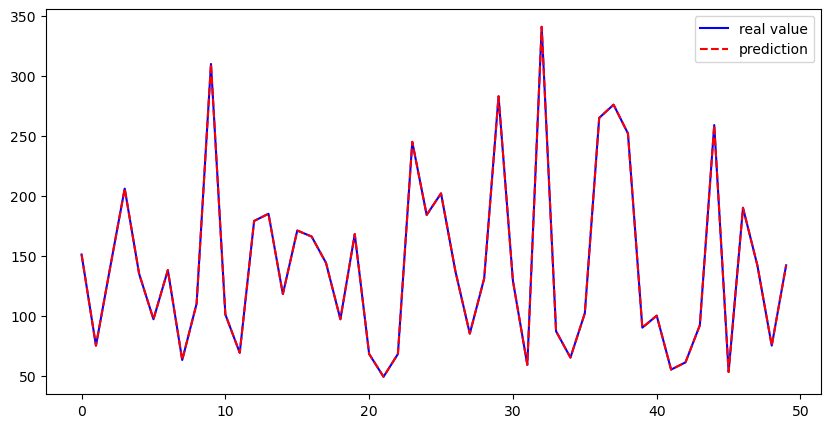

In [49]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# load data
data = load_diabetes()
X, y = data["data"], data["target"]

# construct model
model = DecisionTreeRegressor()
model.fit(X, y)

# predict
prediction = model.predict(X)

# display the first 50 data
plt.figure(figsize = (10, 5))
plt.plot(y[: 50], color = "b", label = "real value")
plt.plot(prediction[: 50], linestyle = "--", color = "r", label = "prediction")
plt.legend()
plt.show()

## Evaluation indicator

### MSE (mean squared error)  

The mean of the square value of errors between prediction and real value.  

$$ MSE = \frac{1}{n_{samples}}\sum_{0}^{n_{samples} - 1}(y - \hat{y})^2 $$  

### MAE (mean absolute error)

The mean of the absolute values of errors between prediction and real value.  

$$ MAE = \frac{1}{n_{samples}}\sum_{0}^{n_{samples} - 1}|{y - \hat{y}}| $$  

### r2_score

Express the fitting level of regression value to real value. If the value is closer to 1, then the fitting effect is better.  

$$ r2\_score(y, \hat{y}) = 1 - \frac{\sum_{0}^{n_{samples} - 1}(y - \hat{y})^2}{\sum_{0}^{n_{samples} - 1}(y - \bar{y})^2} $$

In [37]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# load data
data = load_diabetes()
X, y = data["data"], data["target"]

# construct model
model = LinearRegression()
model.fit(X, y)

# predict
prediction = model.predict(X)

print(f"MSE: {mean_squared_error(prediction, y)}")
print(f"MAE: {mean_absolute_error(prediction, y)}")
print(f"r2_score: {r2_score(prediction, y)}")

MSE: 2859.6963475867506
MAE: 43.27745202531506
r2_score: 0.06856002436177944


# Clustering

## K-means  

K-Means clustering.  

Parameters:  
* n_clusters (int)(<font color="ff0000">default = 8</font>)  
&ensp;&ensp;the number of clusters to form as well as the number of centroids to generate  
* init ("k-means++", "random", callable or array-like of shape (n_clusters, n_features))(<font color="ff0000">default = "k-means++"</font>)
  - k-meas++: selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia
  - random: choose `n_clusters` observations at random from data for the initial centroids
  - array: it should be of shape (n_clusters, n_features) and gives the initial centers
  - callable: take arguemnts X, n_clusters and a random state and return an initialize
* n_init ("auto" or int)(<font color="ff0000">default = "auto"</font>)  
&ensp;&ensp;number of times the k-means algorithm is run with different centroid seeds  
* max_iter (int)(<font color="ff0000">default = 300</font>)  
&ensp;&ensp;maximum number of iterations of the k-means algorithm for a single run  
* tol (float)(<font color="ff0000">default = 1e-4</font>)  
&ensp;&ensp;relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence  
* verbose (int)(<font color="ff0000">default = 0</font>)  
&ensp;&ensp;verbosity mode  
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;determines random number generation for centroid initialization  
* copy_x (bool)(<font color="ff0000">default = True</font>)  
  - True: the original data is not modified
  - False: the original data is modified, and put back before the function returns, but small numerical differences may be introduced by subtracting and then adding the data mean
* algorithm ("lloyd" or "elkan")(<font color="ff0000">default = "lloyd"</font>)  
&ensp;&ensp;K-means algorithm to use
  - lloyd: the classical EM-style algorithm
  - elkan: more efficient on some datasets with well-defined clusters by using the triangle inequality

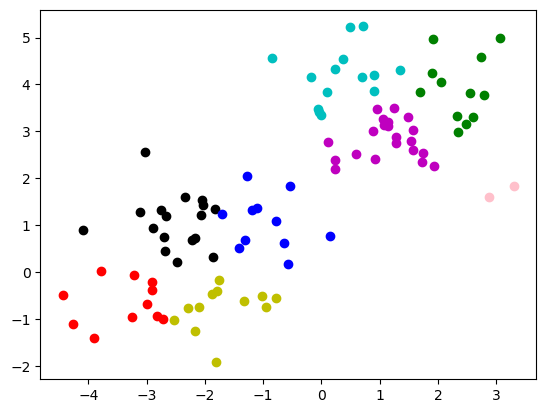

In [68]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# create blobs
data = make_blobs(centers = 2)[0]

# construct model and predict
model = KMeans(n_init = 2)
prediction = model.fit_predict(data)

# display result
colors = ["r", "g", "b", "c", "m", "y", "k", "pink"]
for i, p in enumerate(prediction):
    plt.scatter(data[i, 0], data[i, 1], color = colors[p])

## DBSCAN  

Perform DBSCAN clustering from vector array or distance matrix.  

Parameters:  
* eps (float)(<font color="ff0000">default = 0.5</font>)  
&ensp;&ensp;the maximum distance between two samples for one to be considered as in the neighborhood of the other  
* min_samples (int)(<font color="ff0000">default = 5</font>)  
&ensp;&ensp;the number of samples (or total weight) in a neighborhood for a point to be considered as a core point  
* metric (str or callable)(<font color="ff0000">default = "eucilidean"</font>)  
&ensp;&ensp;the metric to use when calculating distance between instances in a feature array  
* metric_params (dict)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;additional keyword arguments for the metric function  
* algorithm ("auto", "ball_tree", "kd_tree" or "brute")(<font color="ff0000">default = "auto"</font>)  
&ensp;&ensp;the algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors  
* leaf_size (int)(<font color="ff0000">default = 30</font>)  
&ensp;&ensp;leaf size passed to BallTree or cKDTree  
* p (int)(<font color="ff0000">default = 30</font>)  
&ensp;&ensp;the power of the Minkowski metric to be used to calculate distance between points  
* n_jobs (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the number of parallel jobs to run

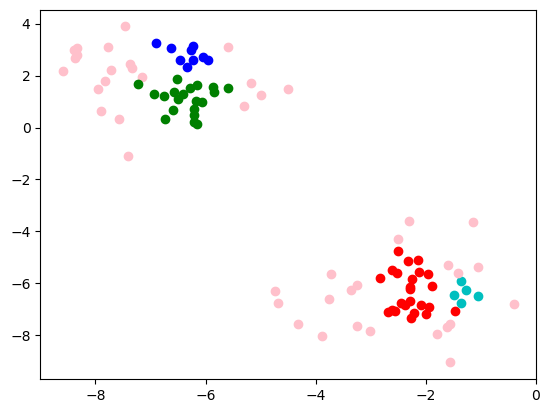

In [69]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# create blobs
data = make_blobs(centers = 2)[0]

# construct model and predict
model = DBSCAN()
prediction = model.fit_predict(data)

# display result
colors = ["r", "g", "b", "c", "m", "y", "k", "pink"]
for i, p in enumerate(prediction):
    plt.scatter(data[i, 0], data[i, 1], color = colors[p])

# Decomposition

## Principal Component Analysis (PCA)  

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.  

Parameters:  
* n_components (int, float or "mle")(<font color="ff0000">default = None</font>)  
&ensp;&ensp;number of components to keep  
* copy (bool)(<font color="ff0000">default = True</font>)  
&ensp;&ensp;If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead.  
* whiten (bool)(<font color="ff0000">default = True</font>)  
&ensp;&ensp;Remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.  
* svd_solver ("auto", "full", "arpack" or "randomized")(<font color="ff0000">default = "auto"</font>)
  - auto: If the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient "randomized" method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.
  - full: run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing
  - arpack: run SVD truncated to n_components calling ARPACK solver via `scipy.sparse.linalg.svds`
  - randomized: run randomized SVD by the method of Halko et al
* tol (float)(<font color="ff0000">default = 0.0</font>)  
&ensp;&ensp;Tolerance for singular values computed by svd_solver == ‘arpack’. Must be of range [0.0, infinity).  
* iterated_power (int or "auto")(<font color="ff0000">default = "auto"</font>)  
&ensp;&ensp;Number of iterations for the power method computed by `svd_solver == "randomized"`. Must be of range [0, infinity).  
* n_oversamples (int)(<font color="ff0000">default = 10</font>)  
&ensp;&ensp;It corresponds to the additional number of random vectors to sample the range of `X` so as to ensure proper conditioning.  
* power_iteration_normalizer ("auto", "QR", "LU" or "none")(<font color="ff0000">default = "auto"</font>)  
&ensp;&ensp;power iteration normalizer for randomized SVD solver  
* random_state (int, RandomState instance or None)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;pass an int for reproducible results across multiple function calls

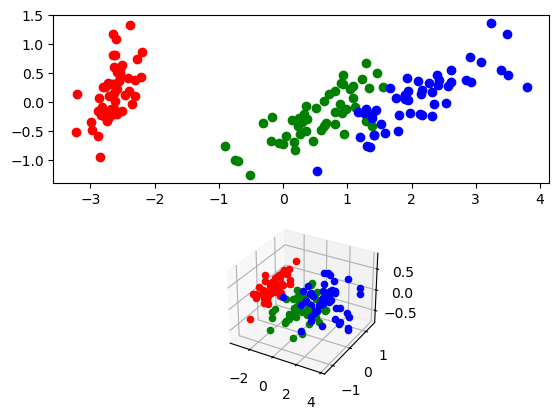

In [85]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# load data
data = load_iris()
X, y = data["data"], data["target"]

# construct model
pca_2d = PCA(n_components = 2)
pca_3d = PCA(n_components = 3)

# decomposition
x_2d = pca_2d.fit_transform(X)
x_3d = pca_3d.fit_transform(X)

# display result
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, projection = "3d")

for i, item in enumerate(x_2d):
    ax1.scatter(item[0], item[1], color = colors[y[i]])
for i, item in enumerate(x_3d):
    ax2.scatter(item[0], item[1], item[2], color = colors[y[i]])
    
plt.show()

## Linear Discriminant Analysis (LDA)  

A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.  

The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.  

The fitted model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions, using the `transform` method.  

Parameters:  
* solver ("svd", "lsqr" or "eigen")(<font color="ff0000">default = "svd"</font>)
  - svd: Singular value decomposition. Recommended for data with large number of features.
  - lsqr: Least squared solution. Can be combined with shrinkage or custom covariance estimator.
  - eigen: Eigenvalue decomposition. Can be combined with shrinkage or custom covariance estimator.
* shrinkage ("auto" or float)(<font color="ff0000">default = None</font>)
  - auto: automatic shrinkage using the Ledoit-Wolf lemma
  - float: fixed shrinkage parameter, must in range (0, 1)
  - None: no shrinkage
* priors (array-like of shape (n_classes, )(<font color="ff0000">default = None</font>)  
&ensp;&ensp;the class prior probabilities  
* n_components (int)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;number of components for dimensionality reduction  
* store_covariance (bool)(<font color="ff0000">default = False</font>)  
&ensp;&ensp;Compute the weighted within-class covariance matrix when `solver` is "svd". The matrix is always computed and stored for the other solvers.  
* tol (float)(<font color="ff0000">default = 1e-4</font>)  
&ensp;&ensp;Absolute threshold for a singular value of X to be considered significant, used to estimate the rank of X.  
* covariance_estimator (covariance estimator)(<font color="ff0000">default = None</font>)  
&ensp;&ensp;used to estimate the covariance matrices instead of relying on the empirical covariance estimator

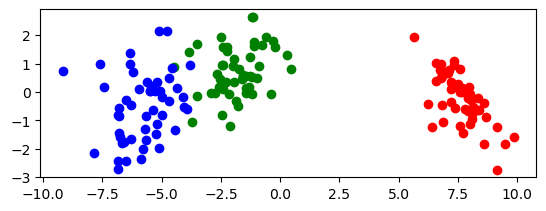

In [90]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# load data
data = load_iris()
X, y = data["data"], data["target"]

# construct model
lda_2d = LDA(n_components = 2)

# decomposition
x_2d = lda_2d.fit_transform(X, y)

# display result
fig = plt.figure()
ax1 = fig.add_subplot(211)

for i, item in enumerate(x_2d):
    ax1.scatter(item[0], item[1], color = colors[y[i]])
    
plt.show()

# Store Model

## 1. joblib

In [92]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
import joblib

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct Logistic Regression model
model = LogisticRegression(max_iter = 500)
model.fit(X, y)

# store model
joblib.dump(model, "lr.m")

# load model
model = joblib.load("lr.m")
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]
Probabilities: 
[[6.91479883e-05 4.34796008e-02 9.56451251e-01]
 [9.08601681e-03 9.76593369e-01 1.43206142e-02]
 [9.88954757e-01 1.10452375e-02 5.34364796e-09]
 [6.22183445e-07 2.13379320e-02 9.78661446e-01]
 [9.76140833e-01 2.38591393e-02 2.76973330e-08]
 [9.04971576e-07 3.91062500e-03 9.96088470e-01]
 [9.86465419e-01 1.35345699e-02 1.13898981e-08]
 [2.26632163e-03 8.05200881e-01 1.92532797e-01]
 [1.12049480e-03 8.01581537e-01 1.97297968e-01]
 [1.68286906e-02 9.56793565e-01 2.63777447e-02]]

Accuracy: 0.9733333333333334


## 2. pickle

In [95]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
import pickle

# load iris dataset
X, y = load_iris(return_X_y = True)
X, y = shuffle(X, y, random_state = 0)

# construct Logistic Regression model
model = LogisticRegression(max_iter = 500)
model.fit(X, y)

# store model
bias = pickle.dumps(model)

with open("lr.pkl", "wb") as f:
    f.write(bias)

# load model
with open ("lr.pkl", "rb") as f:
    bias = f.read()
model = pickle.loads(bias)
print(f"Prediction: {model.predict(X[: 10, : ])}")
print(f"Real:       {y[: 10]}")
print(f"Probabilities: \n{model.predict_proba(X[: 10, : ])}")
print(f"\nAccuracy: {model.score(X, y)}")

Prediction: [2 1 0 2 0 2 0 1 1 1]
Real:       [2 1 0 2 0 2 0 1 1 1]
Probabilities: 
[[6.91479883e-05 4.34796008e-02 9.56451251e-01]
 [9.08601681e-03 9.76593369e-01 1.43206142e-02]
 [9.88954757e-01 1.10452375e-02 5.34364796e-09]
 [6.22183445e-07 2.13379320e-02 9.78661446e-01]
 [9.76140833e-01 2.38591393e-02 2.76973330e-08]
 [9.04971576e-07 3.91062500e-03 9.96088470e-01]
 [9.86465419e-01 1.35345699e-02 1.13898981e-08]
 [2.26632163e-03 8.05200881e-01 1.92532797e-01]
 [1.12049480e-03 8.01581537e-01 1.97297968e-01]
 [1.68286906e-02 9.56793565e-01 2.63777447e-02]]

Accuracy: 0.9733333333333334
